In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pandas as pd

In [ ]:
sns.set_palette("colorblind")

In [ ]:
y_test = np.load('y_test_transfer.npy')
y_pred = np.load('pred_transfer.npy')

Confusion Matrix:
[[437 210  75  20]
 [266 297 136  35]
 [118 185 155  50]
 [ 37  49  76  44]]


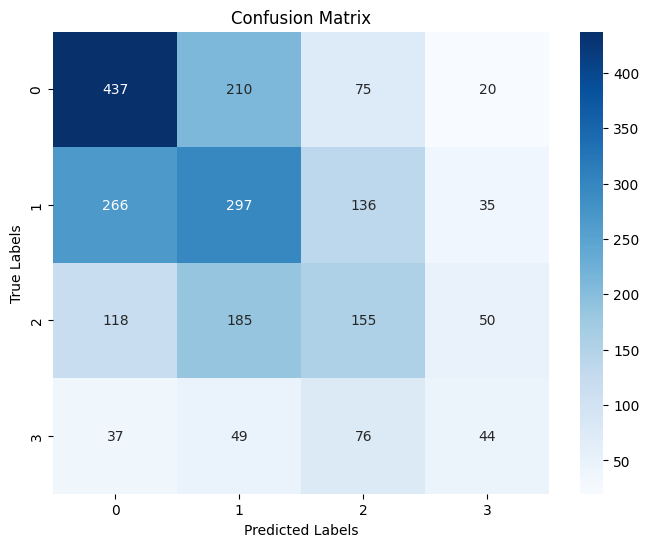

F1 Score (Weighted Average): 0.41905991701351697

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55       742
           1       0.40      0.40      0.40       734
           2       0.35      0.31      0.33       508
           3       0.30      0.21      0.25       206

    accuracy                           0.43      2190
   macro avg       0.39      0.38      0.38      2190
weighted avg       0.42      0.43      0.42      2190



In [ ]:
from sklearn.metrics import classification_report, f1_score,confusion_matrix

# Assuming pred_transfer and y_test_transfer are defined as in your code
# Convert probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix (optional, but recommended)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix_without_transfer.pdf')
plt.show()

# Calculate and print the F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class
print(f"F1 Score (Weighted Average): {f1}")

# Calculate and print other metrics (precision, recall, F1-score per class)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))


In [ ]:
def sum_cat_in_windows(labels, window_size=30,overlap=True):

    num_windows = len(labels) - window_size + 1
    sums = []
    if overlap:
      its=range(num_windows)
    else:
      its=np.arange(0,num_windows,window_size)
    for i in its:
        window = labels[i:i + window_size,:]
        sums.append(np.sum(window,axis=0))
    return np.array(sums)

In [ ]:
def monthly_sum(labels):
  windows=[0,31,28,31,30,31,30,31,30,31,31,30,31]
  windows=np.cumsum(windows)
  sums=[]
  for j in range(6):
    for i in range(12):
      sums.append(np.sum(labels[j*365+windows[i]:j*365+windows[i+1],:],axis=0))
  return np.array(sums)

In [ ]:
true_cats_overlapped = sum_cat_in_windows(y_test[13:])
pred_cats_overlapped = sum_cat_in_windows(y_pred[13:])

In [ ]:
true_cats = monthly_sum(y_test[13:])
pred_cats = monthly_sum(np.eye(4)[np.argmax(y_pred[13:],axis=1)])

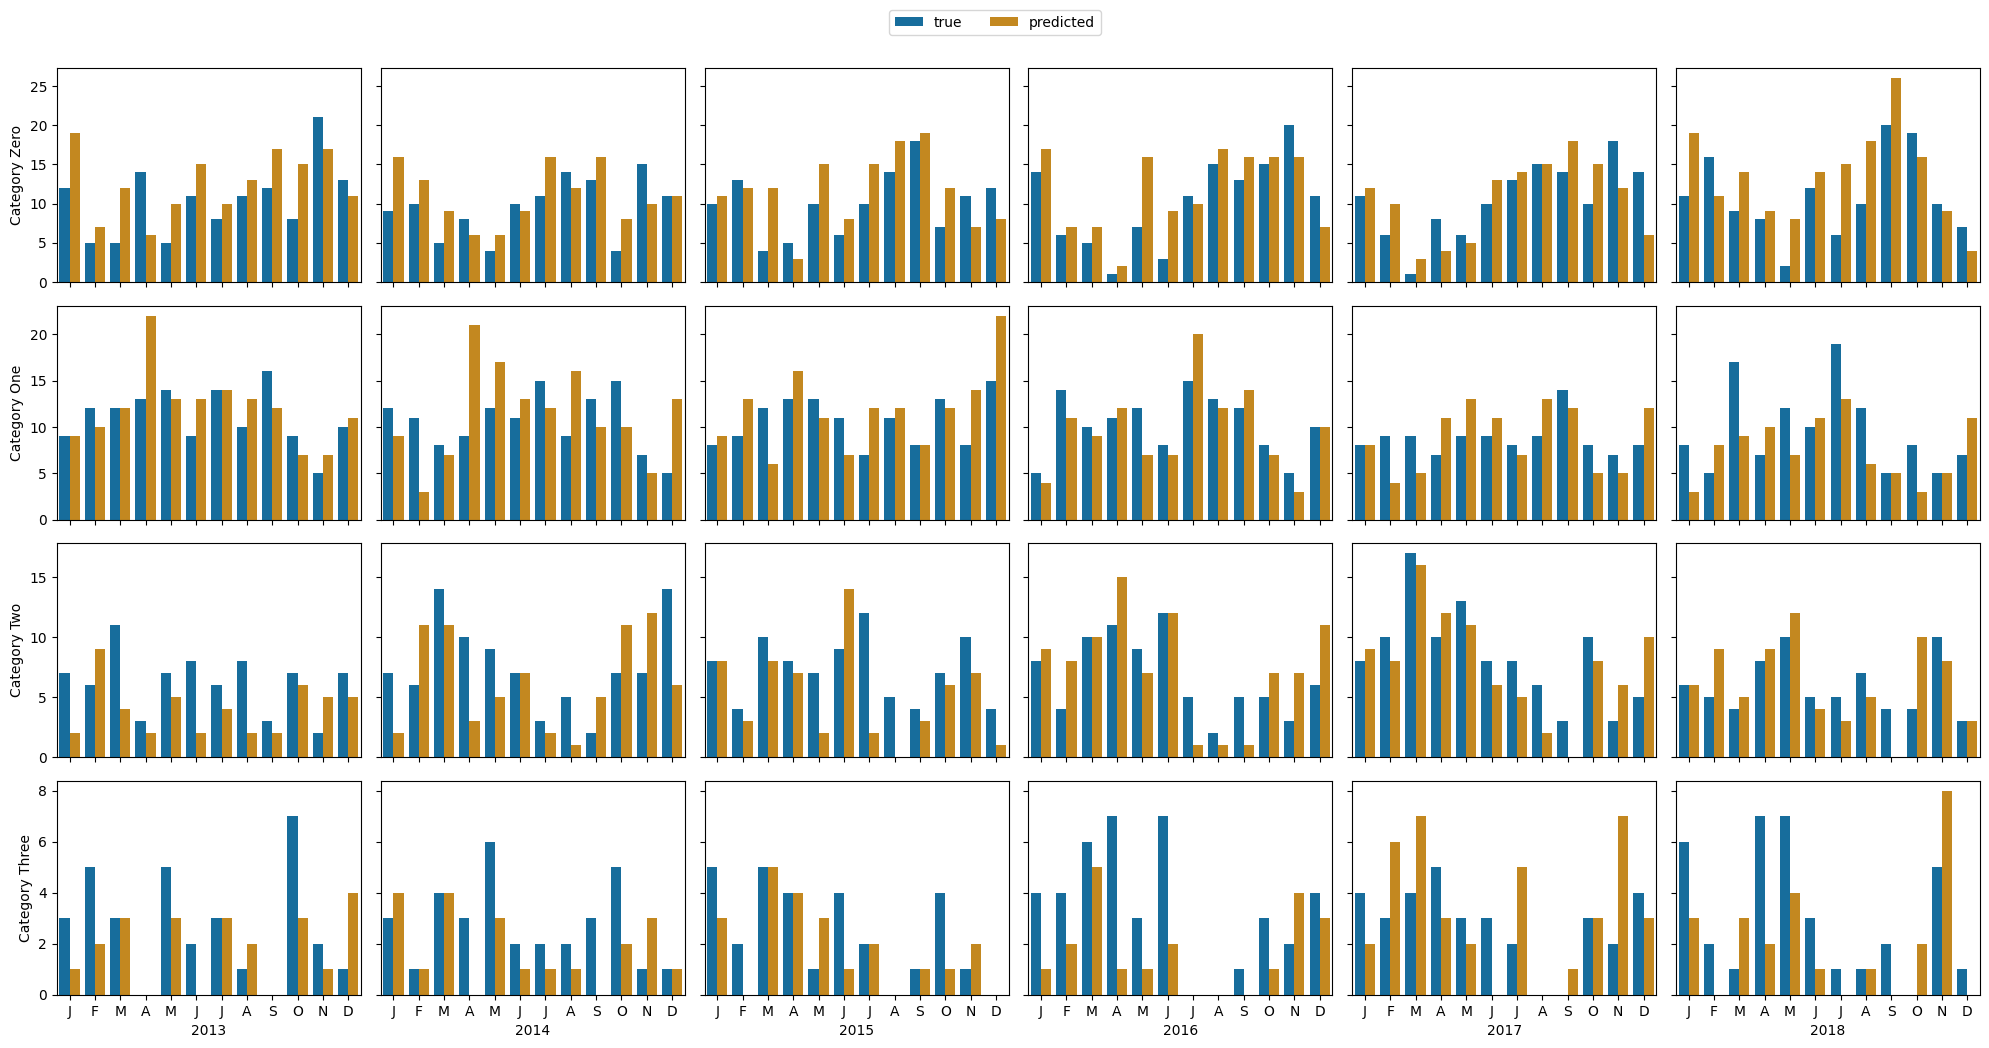

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(4, 6, figsize=(20, 10), sharex=True, sharey='row')

# Set y-axis labels
ax[0, 0].set_ylabel('Category Zero')
ax[1, 0].set_ylabel('Category One')
ax[2, 0].set_ylabel('Category Two')
ax[3, 0].set_ylabel('Category Three')

# Set x-axis labels for years
years = ['2013', '2014', '2015', '2016', '2017','2018']
for i, year in enumerate(years):
    ax[3, i].set_xlabel(year)

# Month initials
month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

# Plotting
for year in range(6):
    for i in range(4):
        df = pd.DataFrame()
        data_true = {"value": true_cats[12*year:12*(year+1), i], "type": "true"}
        df = pd.concat([df, pd.DataFrame(data_true)])
        data_pred = {"value": pred_cats[12*year:12*(year+1), i], "type": "pred"}
        df = pd.concat([df, pd.DataFrame(data_pred)])
        sns.barplot(data=df, x=df.index, y='value', hue='type', ax=ax[i, year])
        handles, labels = ax[i,year].get_legend_handles_labels()

        # Remove duplicate legends
        if ax[i, year].get_legend() is not None:
            ax[i, year].get_legend().remove()

        # Set month labels
        ax[i, year].set_xticks(range(12))
        ax[i, year].set_xticklabels(month_labels)


# One legend outside
fig.legend(handles,["true", "predicted"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout()
plt.show()


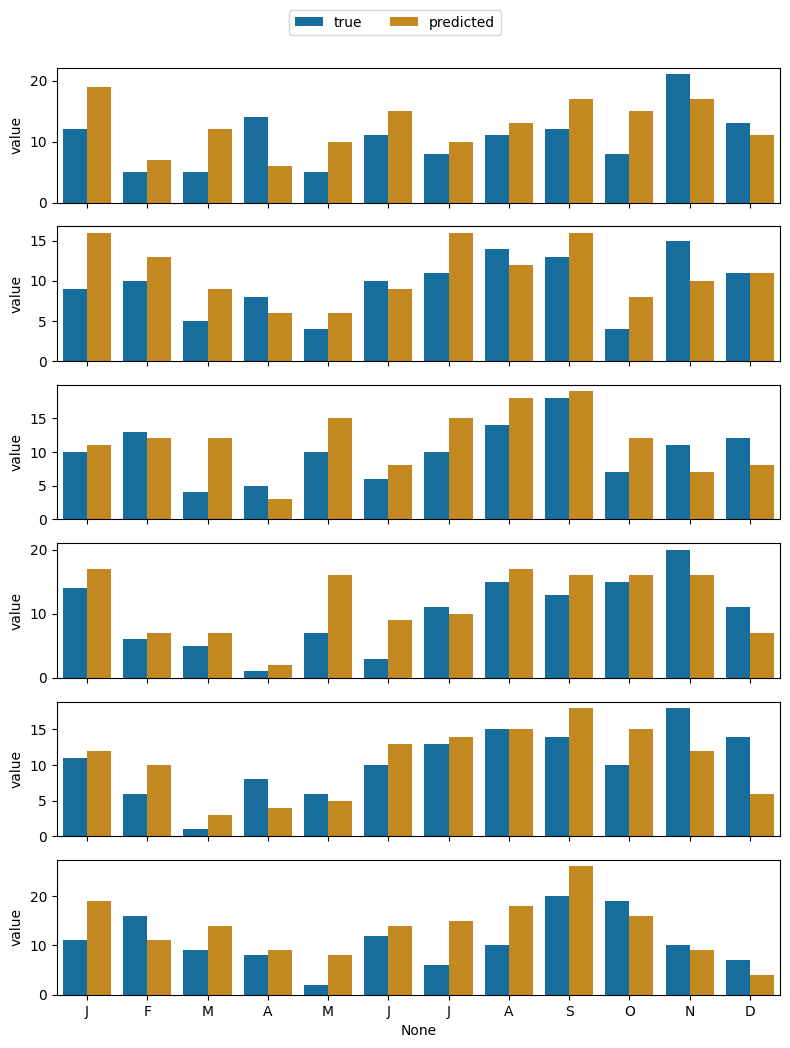

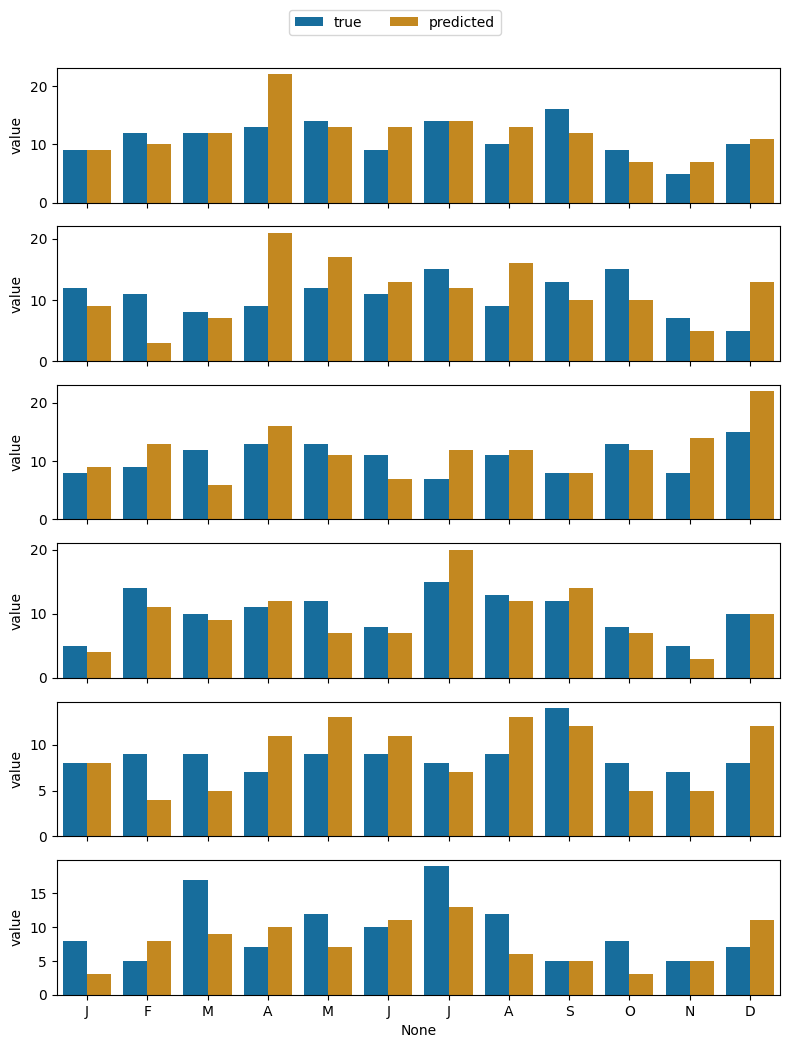

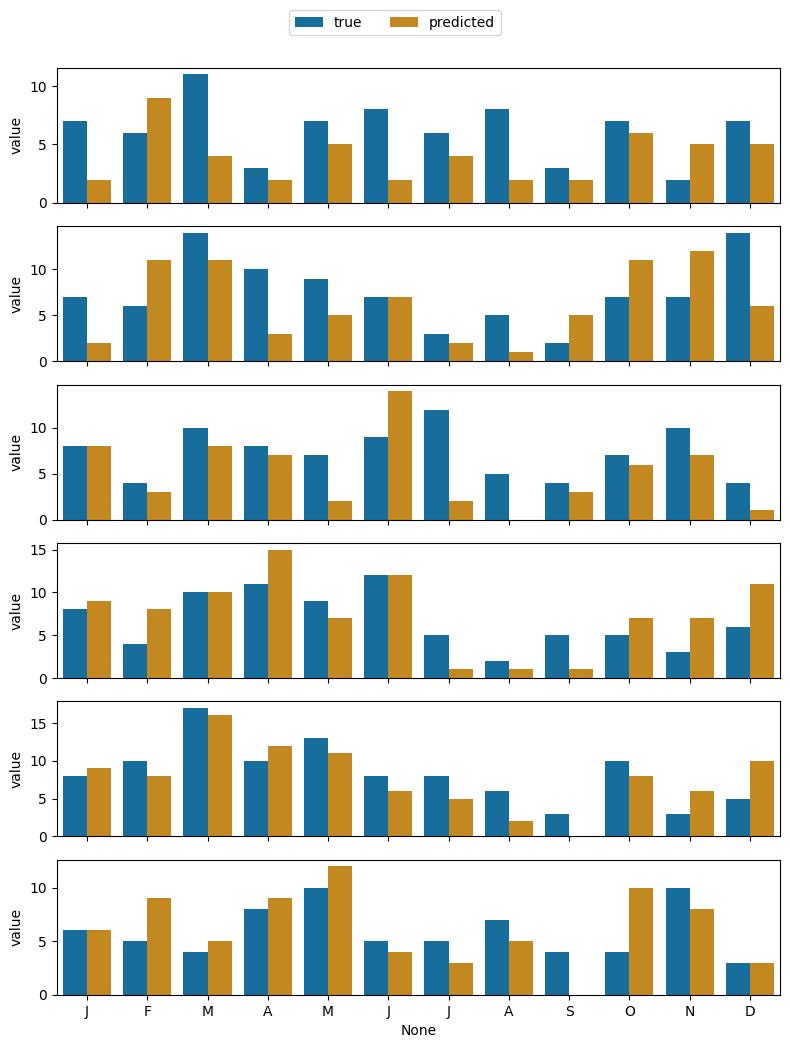

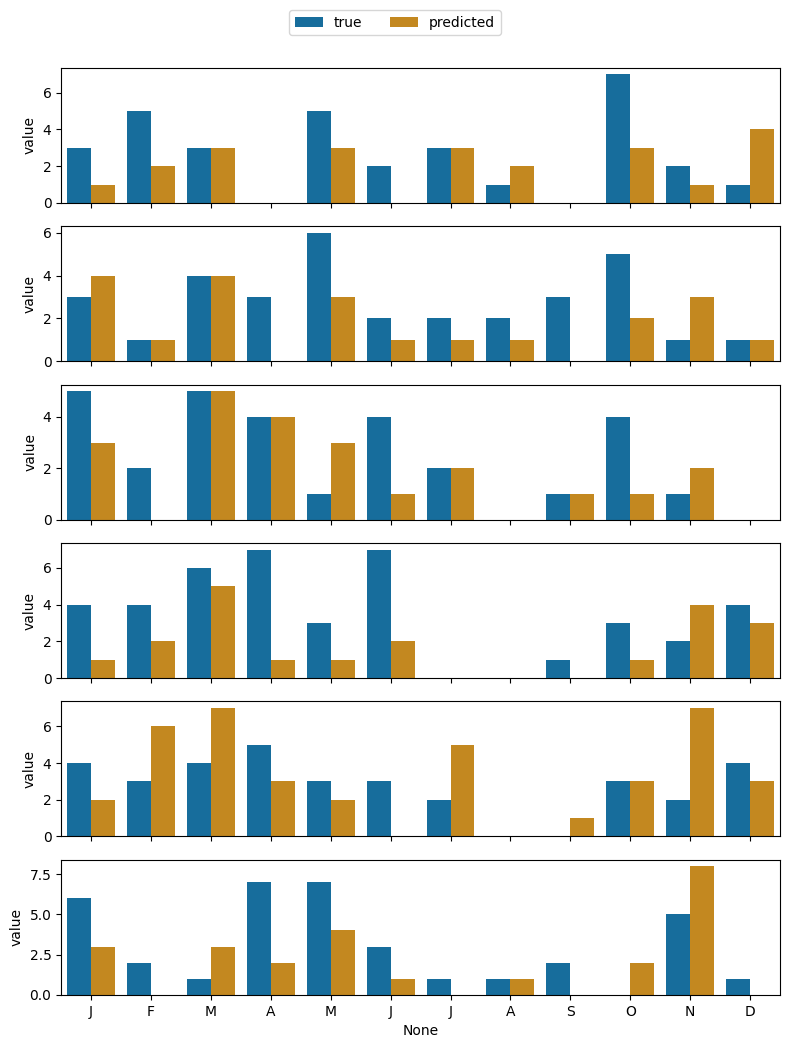

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Set y-axis labels


# Set x-axis labels for years
years = ['2013', '2014', '2015', '2016', '2017','2018']

# Month initials
month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

# Plotting
for i in range(4):
  fig, ax = plt.subplots(6, 1, figsize=(8, 10), sharex=True)
  for year in range(6):

        df = pd.DataFrame()
        data_true = {"value": true_cats[12*year:12*(year+1), i], "type": "true"}
        df = pd.concat([df, pd.DataFrame(data_true)])
        data_pred = {"value": pred_cats[12*year:12*(year+1), i], "type": "pred"}
        df = pd.concat([df, pd.DataFrame(data_pred)])
        sns.barplot(data=df, x=df.index, y='value', hue='type', ax=ax[year])
        handles, labels = ax[year].get_legend_handles_labels()

        # Remove duplicate legends
        if ax[year].get_legend() is not None:
            ax[year].get_legend().remove()

        # Set month labels
        ax[year].set_xticks(range(12))
        ax[year].set_xticklabels(month_labels)
  fig.legend(handles,["true", "predicted"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
  plt.tight_layout()
  plt.show()



# One legend outside


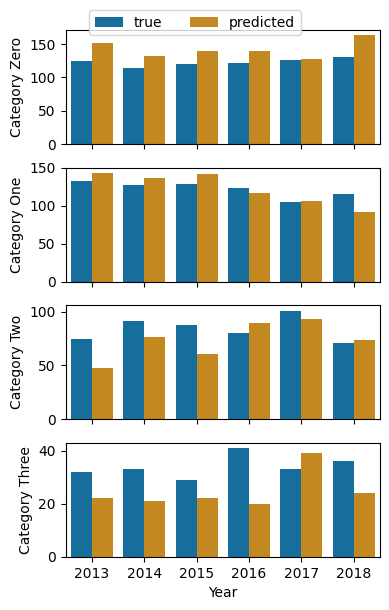

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(4, 1, figsize=(4, 6), sharex=True)

# Category labels
categories = ['Category Zero', 'Category One', 'Category Two', 'Category Three']
years = [ '2013', '2014', '2015', '2016', '2017','2018']

for i in range(4):
    # Sum over each year
    true_sums = [true_cats[12*y:12*(y+1),i].sum() for y in range(6)]
    pred_sums = [pred_cats[12*y:12*(y+1),i].sum() for y in range(6)]

    df = pd.DataFrame({
        'year': years * 2,
        'value': true_sums + pred_sums,
        'type': ['true']*6 + ['predicted']*6
    })

    sns.barplot(data=df, x='year', y='value', hue='type', ax=ax[i])
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].set_ylabel(categories[i])
    ax[i].legend_.remove()

# Single legend outside
fig.legend(handles,['true', 'predicted'], loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

ax[3].set_xlabel('Year')
plt.tight_layout()
plt.show()


In [ ]:
rain=np.load('/content/drive/MyDrive/data/resultados/rain.npy')[13:]
min_pred_rain=y_pred[13:,0]*0+y_pred[13:,1]*0.33+y_pred[13:,2]*2.94+y_pred[13:,3]*9.17
max_pred_rain=y_pred[13:,0]*0.33+y_pred[13:,1]*2.94+y_pred[13:,2]*9.17+y_pred[13:,3]*18.6
avg_pred_rain=y_pred[13:,0]*0+y_pred[13:,1]*1.3+y_pred[13:,2]*5.4+y_pred[13:,3]*13.9

In [ ]:
rain=np.reshape(rain,(len(rain),1))
min_pred_rain=np.reshape(min_pred_rain,(len(min_pred_rain),1))
max_pred_rain=np.reshape(max_pred_rain,(len(max_pred_rain),1))
avg_pred_rain=np.reshape(avg_pred_rain,(len(avg_pred_rain),1))

NameError: name 'month_labels' is not defined

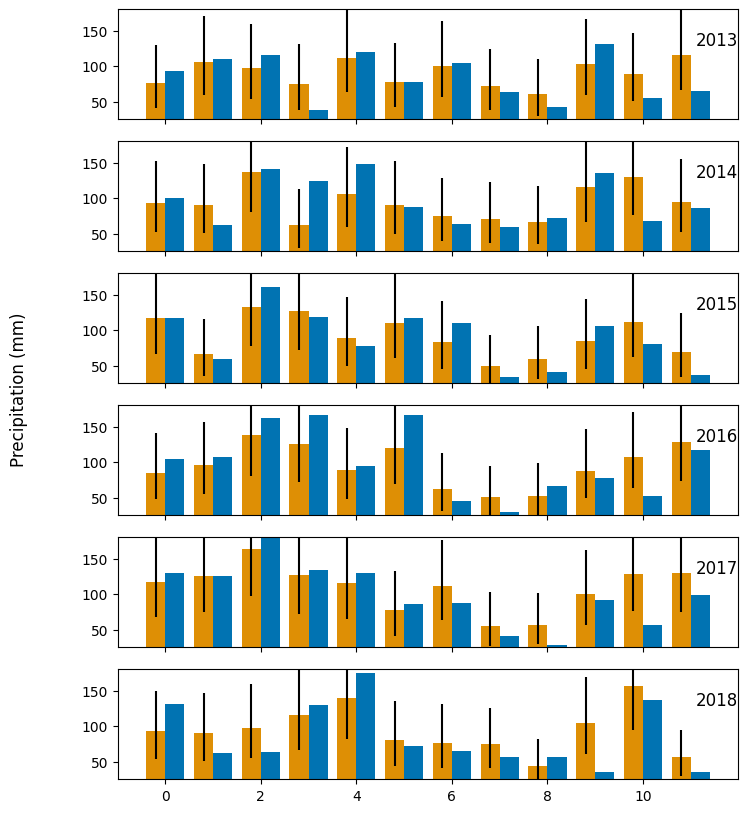

In [ ]:
true_monthly=monthly_sum(rain).flatten()
min_pred_monthly=monthly_sum(min_pred_rain).flatten()
max_pred_monthly=monthly_sum(max_pred_rain).flatten()
avg_pred_monthly=monthly_sum(avg_pred_rain).flatten()

fig,ax=plt.subplots(6,1,figsize=(8,10),sharex=True,sharey=True)
fig.supylabel('Precipitation (mm)',x=-0.01)
for year in np.arange(6):
  ax[year].bar(x=np.arange(12)+0.2,height=true_monthly[year*12:(year+1)*12],width=0.4)
  ax[year].bar(x=np.arange(12)-0.2,height=avg_pred_monthly[year*12:(year+1)*12],width=0.4,yerr=[avg_pred_monthly[year*12:(year+1)*12]-min_pred_monthly[year*12:(year+1)*12],max_pred_monthly[year*12:(year+1)*12]-avg_pred_monthly[year*12:(year+1)*12]])

  ax[year].set_title(str(year+2013),loc='right',y=0.6)
#plt.legend(['true','min_pred','max_pred'])
plt.ylim((25,180))
plt.xticks(ticks=np.arange(12),labels=month_labels)
plt.yticks(ticks=[50,100,150])

plt.xlabel('Month')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


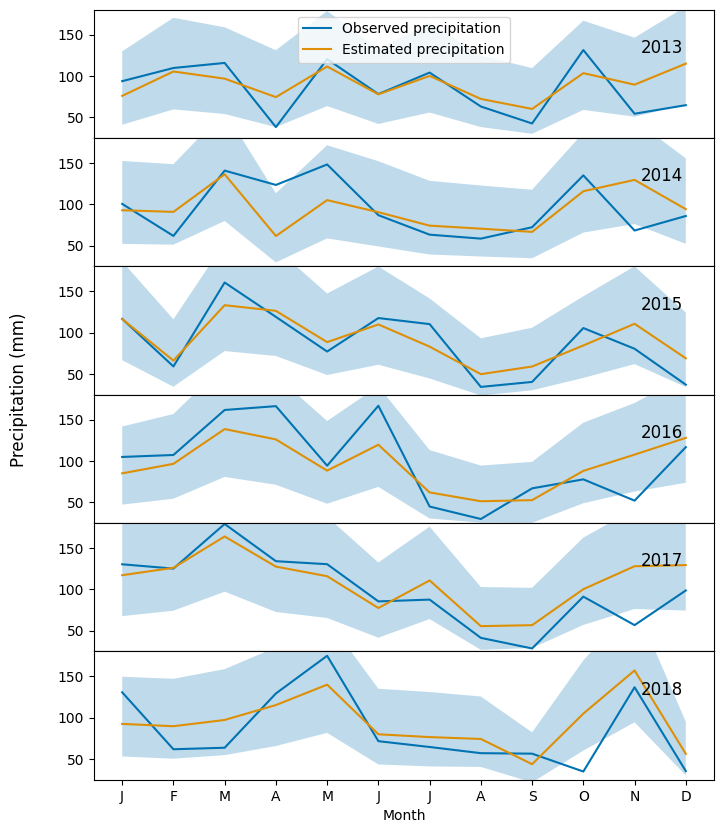

In [ ]:
true_monthly=monthly_sum(rain).flatten()
min_pred_monthly=monthly_sum(min_pred_rain).flatten()
max_pred_monthly=monthly_sum(max_pred_rain).flatten()
avg_pred_monthly=monthly_sum(avg_pred_rain).flatten()

fig,ax=plt.subplots(6,1,figsize=(8,10),sharex=True,sharey=True)
fig.supylabel('Precipitation (mm)')
for year in np.arange(6):
  ax[year].plot(true_monthly[year*12:(year+1)*12],label="Observed precipitation")
  ax[year].plot(avg_pred_monthly[year*12:(year+1)*12],label="Estimated precipitation")

  ax[year].fill_between(x=np.arange(12),y1=max_pred_monthly[year*12:(year+1)*12],y2=min_pred_monthly[year*12:(year+1)*12],alpha=0.25)
  ax[year].set_title(str(year+2013),loc='right',y=0.6,x=0.95)
#plt.legend(['true','min_pred','max_pred'])
plt.ylim((25,180))
plt.xticks(ticks=np.arange(12),labels=month_labels)
plt.yticks(ticks=[50,100,150])
ax[0].legend(loc="upper center")
plt.xlabel('Month')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('Figure8.pdf')
plt.show()


In [ ]:
print(kge(avg_pred_monthly,true_monthly))

(np.float64(0.595337811198848), np.float64(0.7432629123226271), np.float64(0.6899260883403205), np.float64(1.0411305745686272))


In [ ]:
y_predm=np.argmax(y_pred,axis=1)
y_predm=np.eye(4)[y_predm]



In [ ]:
predm_cats_overlapped = sum_cat_in_windows(y_predm)

In [ ]:
def kge(sim, obs):
    sim = np.array(sim)
    obs = np.array(obs)

    # Remove NaNs if necessary
    mask = ~np.isnan(sim) & ~np.isnan(obs)
    sim = sim[mask]
    obs = obs[mask]

    r = np.corrcoef(sim, obs)[0, 1]  # Correlation coefficient
    alpha = np.std(sim) / np.std(obs)  # Variability ratio
    beta = np.mean(sim) / np.mean(obs)  # Bias ratio

    kge_value = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)

    return kge_value, r, alpha, beta
for i in range(4):
  for value in kge(pred_cats[:,i],true_cats[:,i]):
    print(np.round(value,2))

0.58
0.61
1.04
1.16
0.33
0.45
1.38
1.0
0.46
0.53
1.24
0.87
0.35
0.42
0.94
0.73


0.6025035721664078
(np.float64(0.578238825679906), np.float64(0.6025035721664078), np.float64(1.0265795750343127), np.float64(0.8615348267094072))
0.419030418251589
(np.float64(0.3496537252635553), np.float64(0.419030418251589), np.float64(0.7077327106582298), np.float64(0.9978896143808655))
0.4972687557923208
(np.float64(0.4352806345280541), np.float64(0.4972687557923208), np.float64(0.7885012015993004), np.float64(1.146415559663228))
0.37437711737974816
(np.float64(0.2698148687935856), np.float64(0.37437711737974816), np.float64(1.0682205076197397), np.float64(1.3702867765893891))


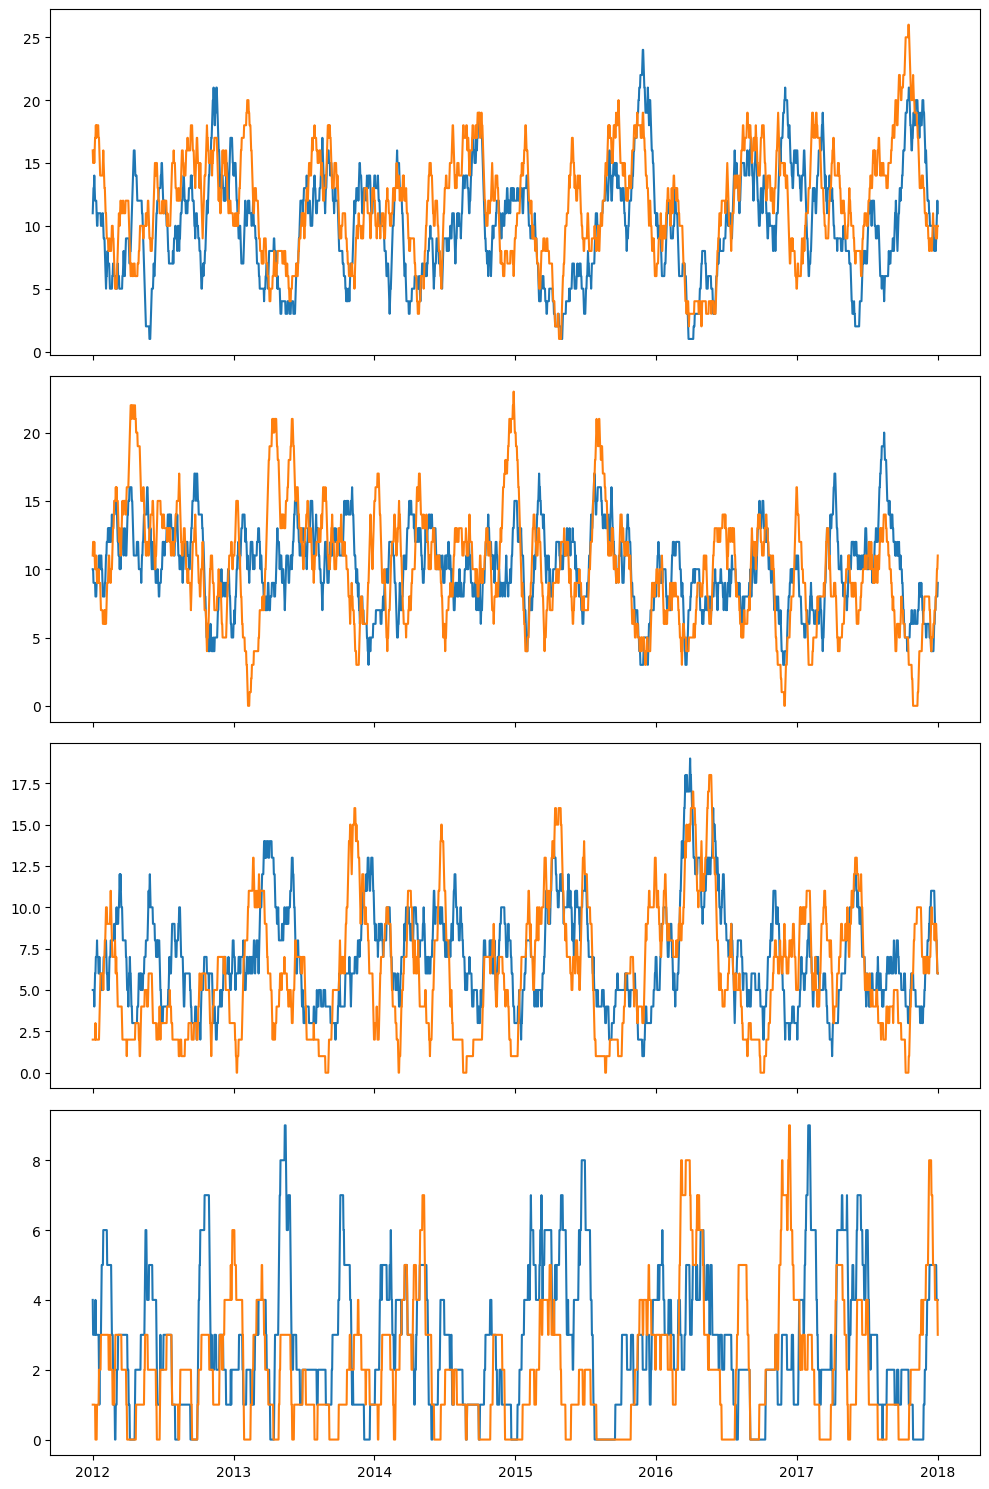

In [ ]:
fig,ax=plt.subplots(4,1,figsize=(10,15),sharex=True)
x=np.linspace(2012,2018,len(true_cats_overlapped))
for i in range(4):
  ax[i].plot(x,true_cats_overlapped[:,i])
  ax[i].plot(x,predm_cats_overlapped[:,i])
  print(np.corrcoef(true_cats_overlapped[:,i].flatten(),predm_cats_overlapped[:,i].flatten())[0,1])
  print(kge(true_cats_overlapped[:,i].flatten(),predm_cats_overlapped[:,i].flatten()))
plt.tight_layout()
plt.savefig('results_categoricalm.pdf')
plt.show()